<a href="https://colab.research.google.com/github/sccn/sound2meg/blob/main/Melspectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from IPython.display import Audio
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd
from resampy import resample
import matplotlib.pyplot as plt

In [8]:
def three_second(audio_file):
    audio_input, sample_rate = librosa.load(audio_file)
    mono_audio = librosa.to_mono(audio_input)

    audio_segment = sample_rate * 3
    segment = mono_audio[:audio_segment]
    data = resample(segment, sample_rate, 16000)
    return data, sample_rate

def wav_mel(file):
  data, sr = three_second(file)
  S = librosa.stft(data, win_length=512, hop_length=128, center = False)
  S = librosa.util.normalize(S)
  mel_spectrogram = librosa.feature.melspectrogram(S=S, n_mels=120)
  #librosa.display.specshow(mel_spectrogram, sr=sr, hop_length=128, x_axis='time', y_axis='mel')

  return mel_spectrogram

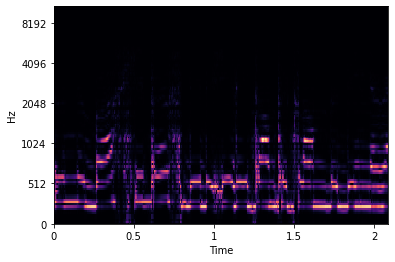

In [9]:
mel = wav_mel('EQ_Ramp_Int2_Int1LPF001.wav')

In [10]:
mel.shape

(120, 360)

In [18]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


FileNotFoundError: ignored

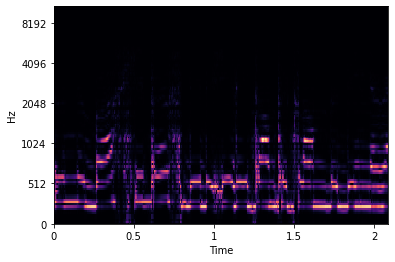

In [19]:
import re
import numpy as np
import torch
import os
import librosa
import torch
import pandas as pd
from scipy import interpolate

audio_path = "/content/drive/MyDrive/Sound_files"

files = os.listdir(audio_path)
# Only first three second segements
for wav_file in files:
    name = re.search('(\d+)\.', wav_file).group().replace('.', '')
    audio = os.path.join(audio_path, wav_file)
    mel = wav_mel(audio)
    np.save(os.path.join('/content/MyDrive/Mel_Embedding', f'mel_{name}.npy'), mel)